In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [8]:
df = pd.read_csv('../data/data_kelulusan.csv')
df.head()


,Nama,NIM,Nilai_Akademik,Kehadiran,Status_Kelulusan
0,Aldi,231011400101,85,90,Lulus
1,Budi,231011400102,70,75,Lulus
2,Cici,231011400103,60,60,Tidak Lulus
3,Deni,231011400104,88,92,Lulus
4,Eka,231011400105,55,65,Tidak Lulus


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nama              10 non-null     object
 1   NIM               10 non-null     int64 
 2   Nilai_Akademik    10 non-null     int64 
 3   Kehadiran         10 non-null     int64 
 4   Status_Kelulusan  10 non-null     object
dtypes: int64(3), object(2)
memory usage: 532.0+ bytes
None
                NIM  Nilai_Akademik  Kehadiran
count  1.000000e+01       10.000000  10.000000
mean   2.310114e+11       72.400000  77.200000
std    3.027650e+00       12.615687  13.189221
min    2.310114e+11       55.000000  60.000000
25%    2.310114e+11       62.000000  66.250000
50%    2.310114e+11       71.000000  77.500000
75%    2.310114e+11       83.250000  88.750000
max    2.310114e+11       90.000000  95.000000


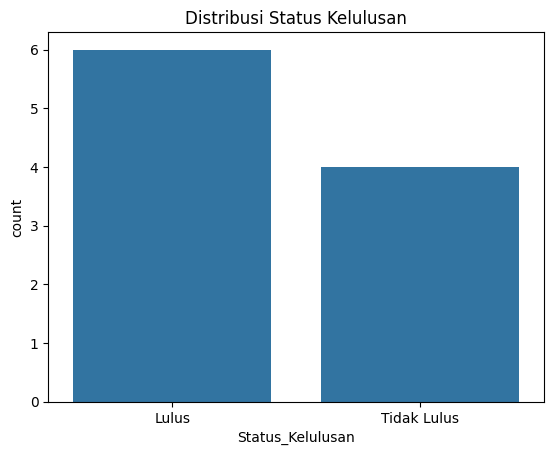

In [9]:
print(df.info())
print(df.describe())

sns.countplot(x='Status_Kelulusan', data=df)
plt.title('Distribusi Status Kelulusan')
plt.show()


In [10]:
# Label encoding untuk kolom target
le = LabelEncoder()
df['Status_Kelulusan'] = le.fit_transform(df['Status_Kelulusan'])

# Pilih fitur dan target
X = df[['Nilai_Akademik', 'Kehadiran']]
y = df['Status_Kelulusan']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Akurasi: 0.5

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Matriks Kebingungan:
 [[0 1]
 [0 1]]


c:\Users\aldob\OneDrive\Dokumen\DATA KULIAH ALDO\SEMESTER 5\UTS\UTS_MachineLearning_KlasifikasiKelulusan\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\aldob\OneDrive\Dokumen\DATA KULIAH ALDO\SEMESTER 5\UTS\UTS_MachineLearning_KlasifikasiKelulusan\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\aldob\OneDrive\Dokumen\DATA KULIAH ALDO\SEMESTER 5\UTS\UTS_MachineLearning_KlasifikasiKelulusan\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetr

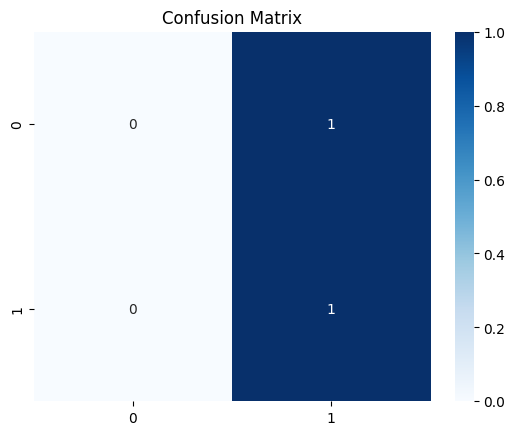

In [12]:
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("\nMatriks Kebingungan:\n", confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.show()


In [13]:
joblib.dump(model, '../models/model_kelulusan.pkl')
print("Model berhasil disimpan di folder 'models'.")


Model berhasil disimpan di folder 'models'.


In [14]:
# Contoh prediksi
data_baru = pd.DataFrame({
    'Nilai_Akademik': [80, 60],
    'Kehadiran': [85, 55]
})

hasil_prediksi = model.predict(data_baru)
hasil_label = le.inverse_transform(hasil_prediksi)

data_baru['Hasil_Prediksi'] = hasil_label
print(data_baru)


   Nilai_Akademik  Kehadiran Hasil_Prediksi
0              80         85          Lulus
1              60         55    Tidak Lulus
